# Support Vector Machine (SVM)

In [2]:
import time
import pandas as pd
from sklearn.svm import LinearSVC,SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,f1_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn.model_selection import cross_val_score, KFold
from scipy.stats import sem

## Question - 1

In [3]:
# Loading of Iris dataset using only the first two varaibles

from sklearn.datasets import make_classification
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
iris = datasets.load_iris()
X = iris.data
X = scaler.fit_transform(X)
y = iris.target
X = X[y != 0, :2]
y = y[y != 0]

In [4]:
# We build the simpliest SVM classifier for class 1 VS class 2 and
# we average the results on n random split with a 1-size/size repartition

def acc_1(n,size):
    # Input:
    # n:number of random split to average the accuracy
    
    # Output:
    # print the mean accuracy and confusion matrix obtained on n split
    
    accuracy=[]
    cnf_mat=np.array([[0, 0],
               [0, 0]])
    for i in range (n):
            X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=size)
            clf = svm.SVC(gamma='scale')
            clf.fit(X_train, y_train) 
            accuracy.append(clf.score(X_test,y_test))
            y_pred=clf.predict(X_test)
            cnf_mat += confusion_matrix(y_test,y_pred)
            
    print('mean accuracy', np.mean(accuracy))
    print('mean confusion matrix:')
    print((1/n)*cnf_mat)

In [5]:
# The score for the simplest classifier is not amazing

acc_1(1000,0.5)

mean accuracy 0.66404
mean confusion matrix:
[[16.5    8.552]
 [ 8.246 16.702]]


## Question 2

### Compare the different types of SVM

In [6]:
def compare (n,kernel,split_size,X,y):
    
    # -----Imputs------
    # n : number of splits we use to average our results
    # kernel : type of SVM we are using (Here 'linear','poly' and 'rbf')
    # split_size : proportion of the test set 
    # X,y : data as usual
    
    # ----Outputs------
    # mean accuracy : the mean of the accuracy on the n splits
    # mean confusion matrix : the mean of the confusion matrices on the n splits
    
    accuracy=[]
    cnf_mat=np.array([[0, 0],
               [0, 0]])
    for i in range (0,n):
        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=split_size)
        clf = svm.SVC(kernel=kernel, gamma='auto')
        clf.fit(X_train,y_train)
        accuracy.append(clf.score(X_test,y_test))
        y_pred=clf.predict(X_test)
        cnf_mat += confusion_matrix(y_test,y_pred)
        
    
    print('mean accuracy', np.mean(accuracy))
    print('mean confusion matrix:')
    print((1/n)*cnf_mat)

In [7]:
# linear result
compare(1000,'linear',0.5,X,y)

mean accuracy 0.6838799999999999
mean confusion matrix:
[[17.467  7.611]
 [ 8.195 16.727]]


In [8]:
# poly result
compare(1000,'poly',0.5,X,y)

mean accuracy 0.58336
mean confusion matrix:
[[17.352  7.721]
 [13.111 11.816]]


In [9]:
# rbf result
compare(1000,'rbf',0.5,X,y)

mean accuracy 0.6713
mean confusion matrix:
[[16.927  8.136]
 [ 8.299 16.638]]


### Let's plot the results on one split to have a better intuition on what is happening

In [10]:
def plot_compare(seed,kernels,split_size,X,y):
    
    # ------Imputs------
    # seed : we chose a seed in order to visualize the result
    # kernels : the types of SVM we want to compare
    # split_size : proportion of the test size
    # X,y : data as usual
    
    # ------Outputs-----
    # plots of the different SVM results with the train and the test set 
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=split_size,random_state=seed)
    
    for kernel in kernels:
        clf = svm.SVC(kernel=kernel, gamma='auto')
        clf.fit(X_train, y_train)
        plt.figure()
        plt.clf()
        plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,edgecolor='k', s=20)
        
        # Circle out the test data
        plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',zorder=10, edgecolor='k')
        

        plt.axis('tight')
        x_min = X[:, 0].min()
        x_max = X[:, 0].max()
        y_min = X[:, 1].min()
        y_max = X[:, 1].max()
    
        XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
        
        # Put the result into a color plot
        Z = Z.reshape(XX.shape)
        plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
        plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
        plt.title(kernel)
        
    plt.show()

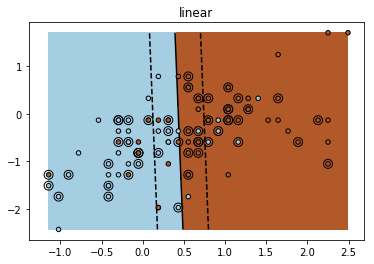

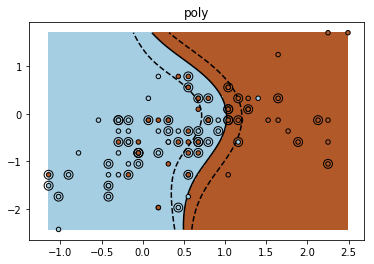

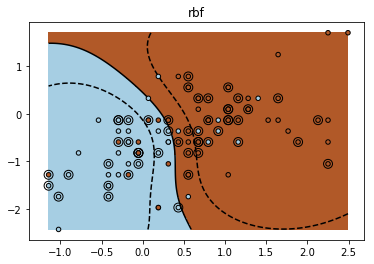

In [11]:
plot_compare(0,('linear', 'poly' , 'rbf') ,0.5,X,y)

## Question 3

Using (2), we can rewrite the condition on ξi and since we are looking to argmin, just resplace ξi by the inferior value we found.

## Question 4

<img src="/home/jean/Downloads/download.png" width="600" height="700">


If we take a look at the hinge loss [here](https://en.wikipedia.org/wiki/Hinge_loss), we can see that it will be above the zero-one loss regarding to missclassification. 

Note that the hinge loss penalizes predictions y < 1, corresponding to the notion of a margin in a support vector machine.

## Faces classification

#### I'm using the fetch olivetti faces dataset already available in sickit learn

### Dataset exploration

In [12]:
from sklearn.datasets import fetch_olivetti_faces

In [13]:
faces = fetch_olivetti_faces()

In [14]:
print (faces.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [15]:
print (faces.keys())
print (faces.images.shape)
print (faces.data.shape)
print (faces.target.shape)

dict_keys(['data', 'images', 'target', 'DESCR'])
(400, 64, 64)
(400, 4096)
(400,)


In [16]:
def show_40_distinct_people(images, unique_ids):
    #Creating 4X10 subplots in  18x9 figure size
    fig, axarr=plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    #For easy iteration flattened 4X10 subplots matrix to 40 array
    axarr=axarr.flatten()
    
    #iterating over user ids
    for unique_id in unique_ids:
        image_index=unique_id*10
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("face id:{}".format(unique_id))
    plt.suptitle("There are 40 distinct people in the dataset")

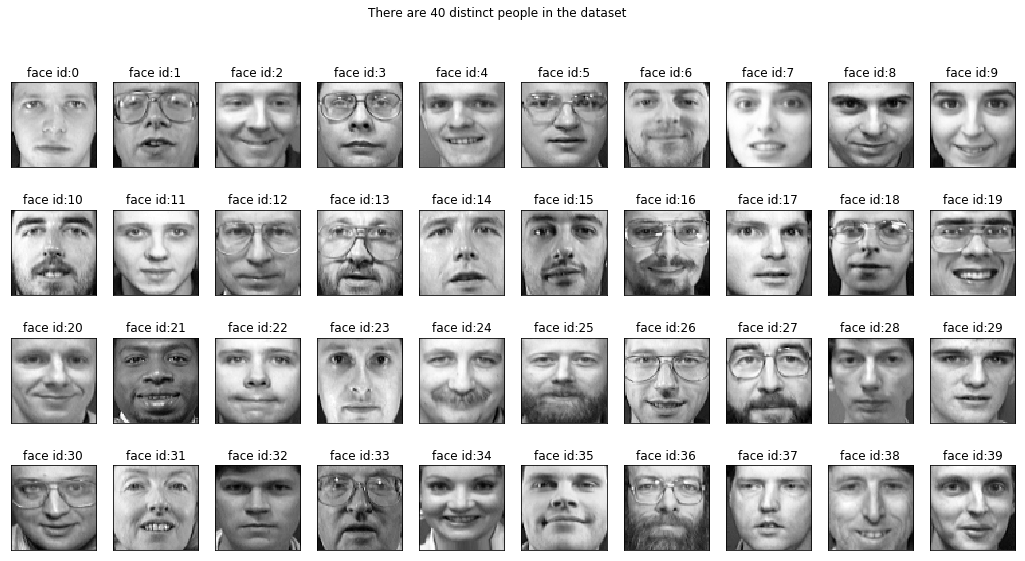

In [17]:
show_40_distinct_people(faces.images, np.unique(faces.target))

## Question 5

#### Use the normalize features

SVM are built using normalized features so we have to normalized before to use it in order to make it as efficient as possible.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size=0.2, random_state=0)

In [19]:
print (np.max(X_train))
print (np.min(X_train))
print (np.mean(X_train))

1.0
0.0
0.5433332


In [20]:
# Normalization

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
print (np.max(X_train))
print (np.min(X_train))
print (np.mean(X_train))

5.0162387
-5.3758216
-1.8626451e-09


## Question 6

In [22]:
# Influence of C on the classifier

then = time.time() 
scores=[]
C_taken=[]
for i in range (0,10):
    C = (1*10**-5)*10**i
    C_taken.append(C)
    clf = svm.SVC(C=C, gamma='auto')
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test,y_test))
now = time.time() 


In [23]:
# Time taken for full dimension

print(now-then)

11.081263780593872


In [24]:
scores

[0.0, 0.0, 0.0, 0.0, 0.0, 0.8875, 0.9625, 0.9625, 0.9625, 0.9625]

In [25]:
np.log(C_taken)

array([-11.51292546,  -9.21034037,  -6.90775528,  -4.60517019,
        -2.30258509,   0.        ,   2.30258509,   4.60517019,
         6.90775528,   9.21034037])

Text(0.5, 0, 'Log(C)')

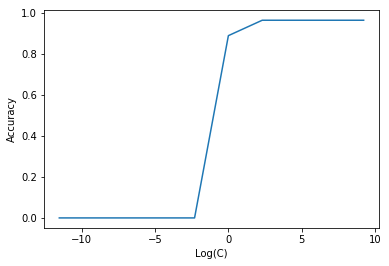

In [26]:
# Plotting the results.

plt.plot(np.log(C_taken),scores)
plt.ylabel('Accuracy')
plt.xlabel('Log(C)')

#### Let's see more preciasely what is happening

In [27]:
# Take a closer look to see what is happening around the accuracy growth

scores=[]
C_taken=[]
for i in range (0,40):
    C = 0.05 + 0.05*i
    C_taken.append(C)
    clf = svm.SVC(C=C, gamma='auto')
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test,y_test))
    

Text(0.5, 0, 'Log(C)')

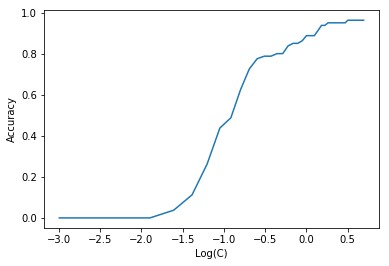

In [28]:
plt.plot(np.log(C_taken),scores)
plt.ylabel('Accuracy')
plt.xlabel('Log(C)')

In [29]:
scores

[0.0,
 0.0,
 0.0,
 0.0375,
 0.1125,
 0.2625,
 0.4375,
 0.4875,
 0.625,
 0.725,
 0.775,
 0.7875,
 0.7875,
 0.8,
 0.8,
 0.8375,
 0.85,
 0.85,
 0.8625,
 0.8875,
 0.8875,
 0.8875,
 0.9125,
 0.9375,
 0.9375,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.9625,
 0.9625,
 0.9625,
 0.9625,
 0.9625,
 0.9625,
 0.9625,
 0.9625]

## Question 7

#### Let's redo it for noise data

In [30]:
# We are adding 300 normalized variables to our dataset in order
# to see the influence of the noise

noise_faces = np.zeros(shape=(400,4396))


for i in range(0,noise_faces.shape[0]):
    for j in range (0,noise_faces.shape[1]):
        if j <= 4095:
            noise_faces[i][j] = faces.data[i][j] 
        else:
            noise_faces[i][j] = np.random.uniform(0,1)
                

In [31]:
X_train, X_test, y_train, y_test = train_test_split(noise_faces, faces.target, test_size=0.2, random_state=0)

In [32]:
print (np.max(X_train))
print (np.min(X_train))
print (np.mean(X_train))

1.0
0.0
0.5402655256386795


In [33]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
print (np.max(X_train))
print (np.min(X_train))
print (np.mean(X_train))

5.016238292655781
-5.375819653832738
-2.0365874591850004e-17


In [35]:
# Re-do it with the noise

scores=[]
C_taken=[]
for i in range (0,10):
    C = (1*10**-5)*10**i
    C_taken.append(C)
    clf = svm.SVC(C=C, gamma='auto')
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test,y_test))

Text(0.5, 0, 'Log(C)')

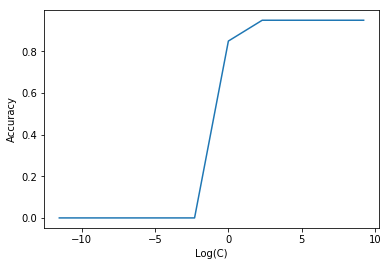

In [36]:
plt.plot(np.log(C_taken),scores)
plt.ylabel('Accuracy')
plt.xlabel('Log(C)')

In [37]:
scores

[0.0, 0.0, 0.0, 0.0, 0.0, 0.85, 0.95, 0.95, 0.95, 0.95]

We can see worst performances with the noise dataset but not as bad as expected, we would need more variables to have a significant drop in the accuracy.

## Question 9

#### Using PCA to reduce the dimension

In [38]:
from sklearn import decomposition
faces = datasets.fetch_olivetti_faces()


In [39]:
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size=0.2, random_state=0)

In [40]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
pca = decomposition.PCA().fit(X_train)

Text(0.5, 0, 'n_components')

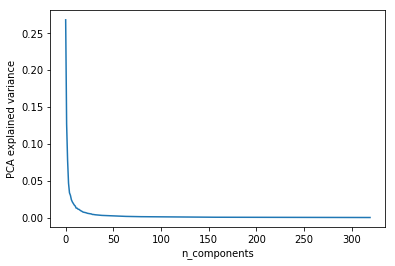

In [42]:
plt.plot(pca.explained_variance_ratio_)
plt.ylabel('PCA explained variance')
plt.xlabel('n_components')

In [43]:
# So we chose around 25 components

pca = decomposition.PCA(n_components=25, whiten=True)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=25, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

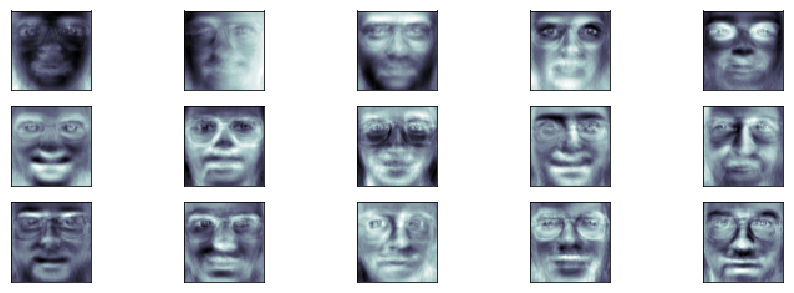

In [44]:
# let's see what PCA are doing to the faces

fig = plt.figure(figsize=(15, 5))
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(faces.images[0].shape),
              cmap=plt.cm.bone)

In [45]:
# Transform the train and test data with PCA

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [46]:
then = time.time() 
scores=[]
C_taken=[]
for i in range (0,10):
    C = (1*10**-5)*10**i
    C_taken.append(C)
    clf = svm.SVC(C=C, gamma='auto')
    clf.fit(X_train_pca, y_train)
    scores.append(clf.score(X_test_pca,y_test))
now = time.time()

In [47]:
print(now-then)

0.2764625549316406


In [48]:
scores

[0.0, 0.0, 0.0, 0.0, 0.0, 0.9375, 0.9625, 0.9625, 0.9625, 0.9625]

We can see here that we have the same performance with PCA-25-components and the full variable data BUT we reduce the computing time by more than 40 times.

Text(0.5, 0, 'Log(C)')

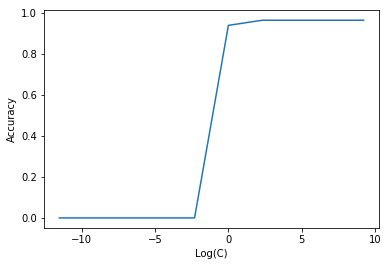

In [49]:
plt.plot(np.log(C_taken),scores)
plt.ylabel('Accuracy')
plt.xlabel('Log(C)')

## Question 9

#### Let's try with RBF

In [50]:
from sklearn import decomposition
faces = datasets.fetch_olivetti_faces()
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size=0.2, random_state=0)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
then = time.time() 
scores=[]
clf = svm.SVC(kernel='rbf', gamma='auto')
clf.fit(X_train, y_train)
scores.append(clf.score(X_test,y_test))
now = time.time()

In [52]:
print(now-then)

1.0888125896453857


In [53]:
scores        

[0.8875]

The score is not as good as before, probably because the complexity is too low to fit the problem as good as before